In [1]:
# Harri Haralds Matulis
# "Digital Humanities Project Course" 2021 Autumn I-II Period

# "Comparison of 6 Lucretius' DE RERUM NATURA translations"


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from functools import reduce
import numpy as np


In [3]:
# to show matplotlib plots in jupyter notebooks
%matplotlib inline

# set some pandas options for display
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_colwidth', 100)

# to show floating numbers with 0 decimals points after dot
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [5]:
# importing Excel file into pandas dataframe
url = '/Users/Haralds/Desktop/H/Helsinki/Helsinki-Courses-2021/LDA-H303-DH-Proj-Course/lucretius-translations-comparison/0-translations-difference-ADJUSTED.xlsx'
df = pd.read_excel(url)

# df.info()
df.head(7)

,01_latin_order,02_latin_tokens,Unnamed: 2,03_eng_direct_tokens,Unnamed: 4,1656_en,1656_order,Unnamed: 7,1743_en,1743_order,...,1916_order,Unnamed: 19,1936_en,1936_order,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,1,aeneadum,NaN,Aenea,NaN,romes,1,NaN,mother,2,...,2,NaN,mother,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,genetrix,NaN,mother,NaN,parent,2,NaN,of,NaN,...,NaN,NaN,of,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,hominum,NaN,human,NaN,venus,7,NaN,rome,1,...,1,NaN,aeneas’s,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4,divomque,NaN,godly,NaN,joy,5,NaN,delight,5,...,5,NaN,sons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,voluptas,NaN,delight,NaN,of,NaN,NaN,of,NaN,...,NaN,NaN,joy,5,NaN,NaN,NaN,NaN,NaN,NaN
5,6,alma,NaN,nourishing,NaN,gods,4,NaN,men,3,...,4,NaN,of,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,venus,NaN,Venus,NaN,above,NaN,NaN,and,NaN,...,NaN,NaN,men,3,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df1 = df.copy()

# dropping columns where all values are NaN
df1.dropna(axis=1, how='all', inplace=True)
# df1.fillna(0, inplace=True)

# df1.to_csv("1-initial-xlsx-as-csv-and-cleaned.csv", encoding='utf-8', index=False)

df1.head(10)

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1656_order,1743_en,1743_order,1872_en,1872_order,1886_en,1886_order,1916_en,1916_order,1936_en,1936_order
0,1,aeneadum,Aenea,romes,1,mother,2,mother,2,mother,2,mother,2,mother,2
1,2,genetrix,mother,parent,2,of,NaN,of,NaN,of,NaN,of,NaN,of,NaN
2,3,hominum,human,venus,7,rome,1,romans,1,the,NaN,rome,1,aeneas’s,1
3,4,divomque,godly,joy,5,delight,5,joy,5,aeneadae,1,delight,5,sons,NaN
4,5,voluptas,delight,of,NaN,of,NaN,of,NaN,darling,5,of,NaN,joy,5
5,6,alma,nourishing,gods,4,men,3,men,3,of,NaN,gods,4,of,NaN
6,7,venus,Venus,above,NaN,and,NaN,and,NaN,men,3,and,NaN,men,3
7,8,caeli,celestial,and,NaN,gods,4,gods,4,and,NaN,men,3,and,NaN
8,9,subter,underneath,men,3,sweet,6,benignant,6,gods,4,dear,6,gods,4
9,10,labentia,to glide,who,NaN,venus,7,venus,7,increase-giving,6,venus,7,venus,7


In [7]:
df2 = df1.copy()

# save in a list column names for 6 translation files - order_numbers
six_tr_headers = ['1656_order', '1743_order', '1872_order', '1886_order', '1916_order', '1936_order']

temp_list = []
for header in six_tr_headers:
    print(header, df2[header].count(), (df2[header].count()/277 * 100) )

# prints - translation year, tokens in English corresponding to a token in Latin, 
# percentage of Lating tokens present in translation

1656_order 181 65.34296028880865
1743_order 214 77.25631768953069
1872_order 212 76.53429602888086
1886_order 239 86.28158844765343
1916_order 208 75.09025270758123
1936_order 233 84.11552346570397


In [21]:
# calculate differences for 6 translations word_order compared to 01_latin_order

for header in six_tr_headers:
    for index, row in df2.iterrows():
        # save value of row['01_latin_order'] under a temporary variable lat_order_nr
        lat_order_nr = row['01_latin_order']
        
        if lat_order_nr == 0:
            lat_order_nr = last_exist_nr + 1
        
        if row[header] != 0:
            df2.loc[index, header + "_" + "diff" ] = lat_order_nr - row[header]
        # save last_exist_nr for the cases if next row['01_latin_order'] will be 0
        last_exist_nr = lat_order_nr

# reorder columns, so that columns for each translation 
# comes in following order – 1656_en  1656_order  1656_order_diff
df2 = df2.reindex(sorted(df2.columns), axis=1)

# df2.to_csv("2-difference-for-every-word-order.csv", encoding='utf-8', index=False)

df2.head(575)

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1656_order,1656_order_diff,1743_en,1743_order,1743_order_diff,1872_en,...,1872_order_diff,1886_en,1886_order,1886_order_diff,1916_en,1916_order,1916_order_diff,1936_en,1936_order,1936_order_diff
0,1,aeneadum,Aenea,romes,1,0,mother,2,-1,mother,...,-1,mother,2,-1,mother,2,-1,mother,2,-1
1,2,genetrix,mother,parent,2,0,of,NaN,NaN,of,...,NaN,of,NaN,NaN,of,NaN,NaN,of,NaN,NaN
2,3,hominum,human,venus,7,-4,rome,1,2,romans,...,2,the,NaN,NaN,rome,1,2,aeneas’s,1,2
3,4,divomque,godly,joy,5,-1,delight,5,-1,joy,...,-1,aeneadae,1,3,delight,5,-1,sons,NaN,NaN
4,5,voluptas,delight,of,NaN,NaN,of,NaN,NaN,of,...,NaN,darling,5,0,of,NaN,NaN,joy,5,0
5,6,alma,nourishing,gods,4,2,men,3,3,men,...,3,of,NaN,NaN,gods,4,2,of,NaN,NaN
6,7,venus,Venus,above,NaN,NaN,and,NaN,NaN,and,...,NaN,men,3,4,and,NaN,NaN,men,3,4
7,8,caeli,celestial,and,NaN,NaN,gods,4,4,gods,...,4,and,NaN,NaN,men,3,5,and,NaN,NaN
8,9,subter,underneath,men,3,6,sweet,6,3,benignant,...,3,gods,4,5,dear,6,3,gods,4,5
9,10,labentia,to glide,who,NaN,NaN,venus,7,3,venus,...,3,increase-giving,6,4,venus,7,3,venus,7,3


In [22]:
# counting diff values

# get difference_columns names from the previous dataframe
diff_cols = ['1656_order_diff', '1743_order_diff', '1872_order_diff',
             '1886_order_diff', '1916_order_diff','1936_order_diff']

# create a list from -15 to 20 and save it to dataframe - for further use as index column
twenty_twenty = list(range(-15, 21))
df3 = pd.DataFrame({"numbers": twenty_twenty})

# loop over diff_cols, get value_counts, save them to temporary dataframe, and save all temp_df to dictionary
dfs_dict = {}
for header in diff_cols:
    temp = df2[header].value_counts().sort_index()
    temp_df = pd.DataFrame(temp.items(), columns=['numbers', header])
    dfs_dict[header] = temp_df

# create a list from all dataframes in dfs_dict
dfs_list = list(dfs_dict.values())

# insert "numbers" -15 to 21 as the first dataframe in the list of dataframes
dfs_list.insert(0, df3)

# merge all dataframes on "numbers" columnm and save in a nev df - counts_merged
counts_merged = reduce(lambda  left,right: pd.merge(left,right,on=['numbers'],
                                            how='outer'), dfs_list).fillna(0)

# counts_merged.to_csv("3-difference_counts_merged.csv", encoding='utf-8', index=False)


counts_merged



,numbers,1656_order_diff,1743_order_diff,1872_order_diff,1886_order_diff,1916_order_diff,1936_order_diff
0,-15,0,0,0,0,0,0
1,-14,0,0,0,0,0,0
2,-13,0,0,0,0,0,0
3,-12,0,0,0,0,0,0
4,-11,1,0,0,0,0,0
5,-10,0,1,0,0,0,0
6,-9,0,1,0,0,0,0
7,-8,2,2,0,0,0,0
8,-7,0,1,0,0,0,0
9,-6,1,3,0,1,0,1


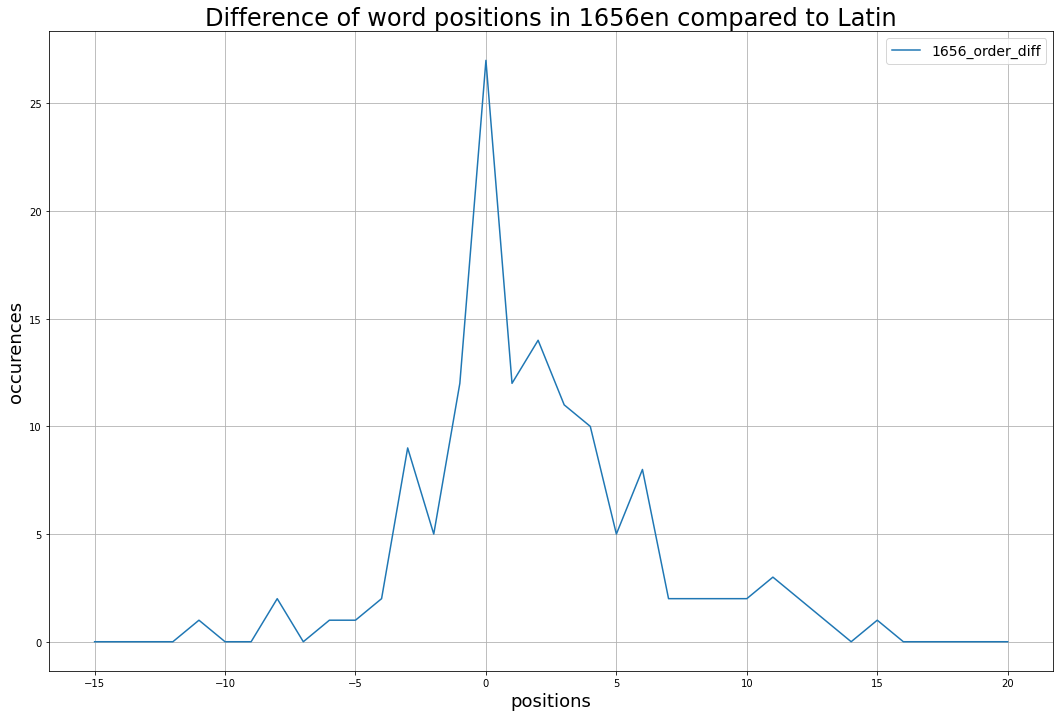

In [12]:
# an example line-plot showing – Difference of word positions in 1656en compared to Latin

f = plt.figure(figsize=(18,40))
ax1 = f.add_subplot(311)

x = counts_merged["numbers"] 
y = counts_merged["1656_order_diff"]
label = "1656_order_diff"
ax1.plot(x,y, label=label)
    
ax1.grid()

ax1.set_ylabel('occurences', fontsize=18)
ax1.set_xlabel('positions', fontsize=18)
ax1.set_title('Difference of word positions in 1656en compared to Latin', fontsize=24)
ax1.legend(["1656_order_diff"], fontsize=14, loc='upper right')

# # plt.xticks(rotation=90)
plt.show()


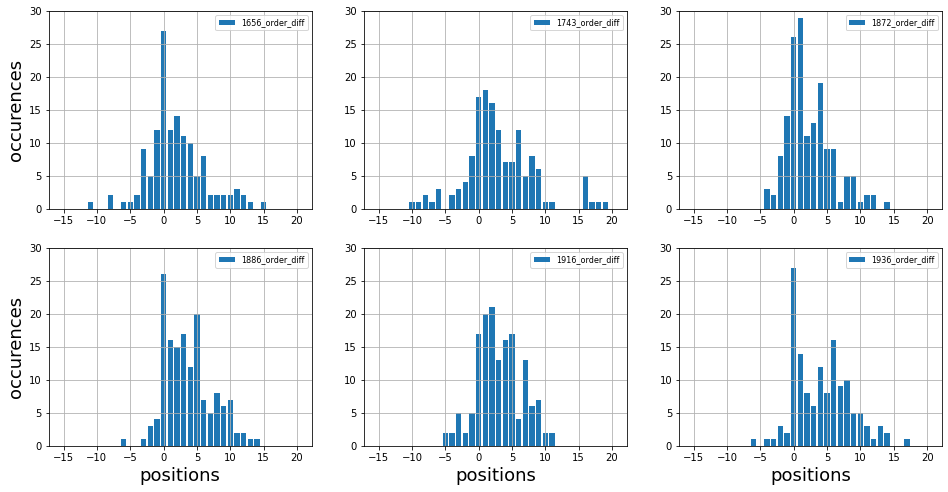

In [13]:
# All 6 translations word order deviation shown as barcharts

f = plt.figure(figsize=(16,8))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 = f.add_subplot(233)
ax4 = f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 = f.add_subplot(236)

plt.ylim(0, 30)

x = counts_merged["numbers"]
y = counts_merged["1656_order_diff"]
ax1.bar(x,y, label=label)
ax1.grid()
ax1.set_ylabel('occurences', fontsize=18)
# ax1.set_xlabel('positions', fontsize=18)
ax1.legend(["1656_order_diff"], fontsize=8, loc='upper right')
ax1.set_ylim(0,30)

x2 = counts_merged["numbers"]
y2 = counts_merged["1743_order_diff"]
ax2.bar(x2,y2, label=label)
ax2.grid()
# ax2.set_ylabel('occurences', fontsize=18)
# ax2.set_xlabel('positions', fontsize=18)
ax2.legend(["1743_order_diff"], fontsize=8, loc='upper right')
ax2.set_ylim(0,30)

x3 = counts_merged["numbers"]
y3 = counts_merged["1872_order_diff"]
ax3.bar(x3,y3, label=label)
ax3.grid()
# ax3.set_ylabel('occurences', fontsize=18)
# ax3.set_xlabel('positions', fontsize=18)
ax3.legend(["1872_order_diff"], fontsize=8, loc='upper right')
ax3.set_ylim(0,30)

x4 = counts_merged["numbers"]
y4 = counts_merged["1886_order_diff"]
ax4.bar(x4,y4, label=label)
ax4.grid()
ax4.set_ylabel('occurences', fontsize=18)
ax4.set_xlabel('positions', fontsize=18)
ax4.legend(["1886_order_diff"], fontsize=8, loc='upper right')
ax4.set_ylim(0,30)

x5 = counts_merged["numbers"]
y5 = counts_merged["1916_order_diff"]
ax5.bar(x5,y5, label=label)
ax5.grid()
# ax5.set_ylabel('occurences', fontsize=18)
ax5.set_xlabel('positions', fontsize=18)
ax5.legend(["1916_order_diff"], fontsize=8, loc='upper right')
ax5.set_ylim(0,30)

x6 = counts_merged["numbers"]
y6 = counts_merged["1936_order_diff"]
ax6.bar(x6,y6, label=label)
ax6.grid()
# ax6.set_ylabel('occurences', fontsize=18)
ax6.set_xlabel('positions', fontsize=18)
ax6.legend(["1936_order_diff"], fontsize=8, loc='upper right')
ax6.set_ylim(0,30)

plt.show()

# saving barcharts subpots to png file
f.savefig("six-translations-positional-deviation.png", facecolor='white', transparent=False)


In [14]:
# minus_list, 0_position, plus_list - for all 6 translations –– not very meaningful, though showw that ALL of 
# translations' deviations are heavily skewed towards (+) side,
# which is mainly due to higher number of tokens in English sentences –
# therefore as every sentence progresses, more and more (+) values are accumulated

# RESULTS –  [-95.0, 0, 339.0], [-93.0, 0, 529.0], [-48.0, 0, 427.0], [-19.0, 0, 583.0], [-42.0, 0, 518.0], [-21.0, 0, 599.0]
### CODE below to obtain these numbers!!
### NB – running this code may change to counts_merged !!!!! - run with caution, re-run all notebook


counts_merged["numbers"]
counts_merged["1656_order_diff"]
counts_merged.columns

cols = [ '1656_order_diff', '1743_order_diff', '1872_order_diff',
       '1886_order_diff', '1916_order_diff', '1936_order_diff']

plus_minus_df = counts_merged.copy()
plus_minus_df[['1656_order_diff', '1743_order_diff', '1872_order_diff',
       '1886_order_diff', '1916_order_diff', '1936_order_diff']] = plus_minus_df[['1656_order_diff', '1743_order_diff', '1872_order_diff',
       '1886_order_diff', '1916_order_diff', '1936_order_diff']].multiply(plus_minus_df['numbers'], axis="index") 

big_list = []
for name in cols:
    temp_list = plus_minus_df[name].tolist()
    minus_list = []
    plus_list = []
    for item in temp_list:
        if item > 0:
            plus_list.append(item)
        if item < 0:
            minus_list.append(item)
    big_list.append([sum(minus_list), 0, sum(plus_list)])

# #     print(minus_list)
print(big_list)

[[-95.0, 0, 339.0], [-93.0, 0, 529.0], [-48.0, 0, 427.0], [-19.0, 0, 583.0], [-42.0, 0, 518.0], [-21.0, 0, 599.0]]


In [23]:
# get a dataframe of all Latin tokens and Eng_direct_tokens 

df_latin_init = df2[["01_latin_order", "02_latin_tokens", "03_eng_direct_tokens"]].copy()

# drop rows from df_latin, where NaN in "01_latin_order"
df_latin_init = df_latin_init.dropna(subset=["01_latin_order"])
# df_latin_init.head(10)

six_trunc_headers = ['1656_', '1743_', '1872_', '1886_', '1916_', '1936_']
# six_trunc_headers = ['1656_']


dict_of_dfs = {}
for header in six_trunc_headers:
    temp_df = df2[[header + "en", header + "order"]].copy()
    temp_df["01_latin_order"] = temp_df[header + "order"]
    del temp_df[header + "order"]
    temp_df = temp_df.dropna()
    dict_of_dfs[header] = temp_df

# create a list from all dataframes in dict_of_dfs
list_of_dfs = list(dict_of_dfs.values())

# insert "df_latin_init" - as the first dataframe in the list of dataframes
list_of_dfs.insert(0, df_latin_init)

# merge all dataframes on "numbers" columnm and save in a nev df - counts_merged
occ_merged = reduce(lambda  left,right: pd.merge(left,right,on=['01_latin_order'],
                                            how='outer'), list_of_dfs).fillna(0)


# occ_merged.to_csv("4-latin-tokens-and-their-translations-in-each-edition.csv", encoding='utf-8', index=False)


occ_merged

# prints - a dataframe of Latin tokens and their respective translations in each of 6 English
# editions. If no token corresponding in the English - it is replaced by "0"

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1743_en,1872_en,1886_en,1916_en,1936_en
0,1,aeneadum,Aenea,romes,rome,romans,aeneadae,rome,aeneas’s
1,2,genetrix,mother,parent,mother,mother,mother,mother,mother
2,3,hominum,human,men,men,men,men,men,men
3,4,divomque,godly,gods,gods,gods,gods,gods,gods
4,5,voluptas,delight,joy,delight,joy,darling,delight,joy
5,6,alma,nourishing,0,sweet,benignant,increase-giving,dear,life-giver
6,7,venus,Venus,venus,venus,venus,venus,venus,venus
7,8,caeli,celestial,heaven,heaven,heaven,heaven,stars,heaven
8,9,subter,underneath,under,beneath,beneath,beneath,beneath,beneath
9,10,labentia,to glide,move,rolling,gliding,gliding,gliding,gliding


In [24]:
# copy a df from "occ_merged"
variance_df = occ_merged.copy()

# create a temporary list
big_list = []

# loop over every row and save 6 translated words into a list "all_six", and append this list to big_list
for index, row in variance_df.iterrows():
    all_six = list(row[3:9])
    big_list.append(all_six)

# save big_list as a column of df    
variance_df['full_list'] = big_list

# replace 0 values with numpy NaN values
variance_df.replace(0, np.nan, inplace=True)

# add 2 more columns to a df – "nr_of_words" and "uniques"
for index, row in variance_df.iterrows():
    variance_df.loc[index,'nr_of_words'] = row[3:9].count()
    variance_df.loc[index,'uniques'] = row[3:9].nunique()

variance_df   


,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1743_en,1872_en,1886_en,1916_en,1936_en,full_list,nr_of_words,uniques
0,1,aeneadum,Aenea,romes,rome,romans,aeneadae,rome,aeneas’s,"[romes, rome, romans, aeneadae, rome, aeneas’s]",6,5
1,2,genetrix,mother,parent,mother,mother,mother,mother,mother,"[parent, mother, mother, mother, mother, mother]",6,2
2,3,hominum,human,men,men,men,men,men,men,"[men, men, men, men, men, men]",6,1
3,4,divomque,godly,gods,gods,gods,gods,gods,gods,"[gods, gods, gods, gods, gods, gods]",6,1
4,5,voluptas,delight,joy,delight,joy,darling,delight,joy,"[joy, delight, joy, darling, delight, joy]",6,3
5,6,alma,nourishing,NaN,sweet,benignant,increase-giving,dear,life-giver,"[0, sweet, benignant, increase-giving, dear, life-giver]",5,5
6,7,venus,Venus,venus,venus,venus,venus,venus,venus,"[venus, venus, venus, venus, venus, venus]",6,1
7,8,caeli,celestial,heaven,heaven,heaven,heaven,stars,heaven,"[heaven, heaven, heaven, heaven, stars, heaven]",6,2
8,9,subter,underneath,under,beneath,beneath,beneath,beneath,beneath,"[under, beneath, beneath, beneath, beneath, beneath]",6,2
9,10,labentia,to glide,move,rolling,gliding,gliding,gliding,gliding,"[move, rolling, gliding, gliding, gliding, gliding]",6,3


In [26]:
sorted_variance_df = variance_df

sorted_variance_df = sorted_variance_df.sort_values(['uniques', 'nr_of_words'], ascending=[False, True])

# sorted_variance_df.to_csv("5-latin-tokens-sorted-with-most-unique-translations-in-english.csv", encoding='utf-8', index=False)


sorted_variance_df
# prints – tokens in Latin sorted with most unique translations in English

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1743_en,1872_en,1886_en,1916_en,1936_en,full_list,nr_of_words,uniques
41,42,daedala,skilful / Daedalus,th'inamel'd,art,plastic,manifold,daedal,quaint,"[th'inamel'd, art, plastic, manifold, daedal, quaint]",6,6
58,59,patefactast,"to lay open, open",brings,leads,unlocks,disclosed,comes,revealed,"[brings, leads, unlocks, disclosed, comes, revealed]",6,6
112,113,incutiens,strike,infuse,inspiring,infusing,striking,kindling,strike,"[infuse, inspiring, infusing, striking, kindling, strike]",6,6
128,129,gubernas,govern,reign,govern,rulest,mistress,guidest,pilot,"[reign, govern, rulest, mistress, guidest, pilot]",6,6
218,219,suspiciens,looking up,bending,back,looking,upturned,backward,pillowing,"[bending, back, looking, upturned, backward, pillowing]",6,6
249,250,loquellas,"speech, words, chatter",accents,eloquence,words,discourse,syllables,petition,"[accents, eloquence, words, discourse, syllables, petition]",6,6
251,252,petens,"seek, look for",require,implore,Imploring,asking,win,seeking,"[require, implore, Imploring, asking, win, seeking]",6,6
259,260,agere,"to act, lead, move",philosophize,write,pursue,think,attend,set,"[philosophize, write, pursue, think, attend, set]",6,6
262,263,tempore,times,whilst,times,hours,day,season,time,"[whilst, times, hours, day, season, time]",6,6
5,6,alma,nourishing,NaN,sweet,benignant,increase-giving,dear,life-giver,"[0, sweet, benignant, increase-giving, dear, life-giver]",5,5


In [27]:
latins_0 = sorted_variance_df[["01_latin_order", "02_latin_tokens","03_eng_direct_tokens", "uniques"]][0:14]
latins_0

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,uniques
41,42,daedala,skilful / Daedalus,6
58,59,patefactast,"to lay open, open",6
112,113,incutiens,strike,6
128,129,gubernas,govern,6
218,219,suspiciens,looking up,6
249,250,loquellas,"speech, words, chatter",6
251,252,petens,"seek, look for",6
259,260,agere,"to act, lead, move",6
262,263,tempore,times,6
5,6,alma,nourishing,5


In [28]:
latins_1 = sorted_variance_df[["01_latin_order", "02_latin_tokens","03_eng_direct_tokens", "uniques"]][56:65]
latins_1

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,uniques
37,38,adventumque,"to reach, arrive at",4
59,60,verna,of spring (adj sg fem),4
66,67,favoni,the west wind (Favonius),4
82,83,persultant,"to leap about, range through",4
89,90,ita,"thus, so",4
91,92,lepore,charm,4
174,175,dictis,words,4
183,184,per,for,4
188,189,sopita,"sleep, repose",4


In [29]:
latins_6 = sorted_variance_df[56:65]
latins_6

,01_latin_order,02_latin_tokens,03_eng_direct_tokens,1656_en,1743_en,1872_en,1886_en,1916_en,1936_en,full_list,nr_of_words,uniques
37,38,adventumque,"to reach, arrive at",com'st,approach,coming,advent,coming,coming,"[com'st, approach, coming, advent, coming, coming]",6,4
59,60,verna,of spring (adj sg fem),springs,spring,vernal,vernal,springtime,spring,"[springs, spring, vernal, vernal, springtime, spring]",6,4
66,67,favoni,the west wind (Favonius),west,western,zephyrs,favonius,west,west,"[west, western, zephyrs, favonius, west, west]",6,4
82,83,persultant,"to leap about, range through",jump,frisk,bound,bound,leap,bound,"[jump, frisk, bound, bound, leap, bound]",6,4
89,90,ita,"thus, so",where,so,thus,such,thus,so,"[where, so, thus, such, thus, so]",6,4
91,92,lepore,charm,beauty,charms,charms,charms,spell,charm,"[beauty, charms, charms, charms, spell, charm]",6,4
174,175,dictis,words,flow,verse,words,lays,words,words,"[flow, verse, words, lays, words, words]",6,4
183,184,per,for,by,by,throughout,throughout,o'er,over,"[by, by, throughout, throughout, o'er, over]",6,4
188,189,sopita,"sleep, repose",peace,asleep,rest,rest,rest,sleep,"[peace, asleep, rest, rest, rest, sleep]",6,4
